In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [140]:
df=pd.read_csv("news.csv")

In [141]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [143]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [144]:
X=df.text
Y = df['label']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)


In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068,), (1267,), (5068,), (1267,))

In [147]:
v=TfidfVectorizer(stop_words='english',max_df=0.7)

In [148]:
rf_train=v.fit_transform(X_train)
rf_test=v.transform(X_test)

In [149]:
model=PassiveAggressiveClassifier(max_iter=50)

m

In [150]:
model.fit(rf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [151]:
model.score(rf_test,y_test)*100

92.89660615627466

In [152]:
e=v.transform(["And I don’t think the people of France have any doubts about America’s understanding of what happened, of our personal sense of loss and our deep commitment to the people of France in this moment of trauma."])

In [153]:
model.predict(e)[0]

'FAKE'

In [154]:
df.label=df.label.apply(lambda x: 0 if x=='FAKE'  else 1 )

In [155]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [160]:
df=df.sort_values(by='label',ascending=True)

In [161]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
5063,9395,Someone Just Donated $2.5 Million to Bail Out ...,By Nick Bernabe \nFollowing the recent mass ar...,0
2588,8372,Nation’s Top Lawyers Have Had Enough Of Trump ...,Ted Boutrous is a successful lawyer. He is a w...,0
5062,8313,Huma may have violated ‘legal obligation’ rega...,Print \nRepublican National Committee spokesma...,0
2590,5358,TOP DEMOCRATIC DONOR: BLACKS ARE “SERIOUSLY F*...,Home › POLITICS › TOP DEMOCRATIC DONOR: BLACKS...,0
...,...,...,...,...
2872,619,Top Republicans join Obama in condemning Trump...,Top Republicans joined with President Obama an...,1
2873,5101,"Clinton, Democrats try not to get drowned out ...",Cincinnati (CNN) While Republicans rally in Cl...,1
2874,3238,GOP Hopefuls’ 2016 Theme Has a New Pitch,Several Republicans eyeing presidential bids i...,1
2850,3901,Our President and the Constitution: Barack Oba...,Can the president rewrite federal laws? Can he...,1


In [162]:
df.label=df.label.apply(lambda x: 'FAKE' if x==0  else 'REAL' )

In [163]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
5063,9395,Someone Just Donated $2.5 Million to Bail Out ...,By Nick Bernabe \nFollowing the recent mass ar...,FAKE
2588,8372,Nation’s Top Lawyers Have Had Enough Of Trump ...,Ted Boutrous is a successful lawyer. He is a w...,FAKE
5062,8313,Huma may have violated ‘legal obligation’ rega...,Print \nRepublican National Committee spokesma...,FAKE
2590,5358,TOP DEMOCRATIC DONOR: BLACKS ARE “SERIOUSLY F*...,Home › POLITICS › TOP DEMOCRATIC DONOR: BLACKS...,FAKE
...,...,...,...,...
2872,619,Top Republicans join Obama in condemning Trump...,Top Republicans joined with President Obama an...,REAL
2873,5101,"Clinton, Democrats try not to get drowned out ...",Cincinnati (CNN) While Republicans rally in Cl...,REAL
2874,3238,GOP Hopefuls’ 2016 Theme Has a New Pitch,Several Republicans eyeing presidential bids i...,REAL
2850,3901,Our President and the Constitution: Barack Oba...,Can the president rewrite federal laws? Can he...,REAL


In [133]:
count_lable=df.groupby('label')['label'].count()

count_lable

label
0    3164
1    3171
Name: label, dtype: int64

In [136]:
count=0
for i in range (1500):
   if df.loc[i].label==0:
       df= df.drop(i)
       

KeyError: 0

In [137]:
count_lable=df.groupby('label')['label'].count()

count_lable

label
0    2664
1    3171
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

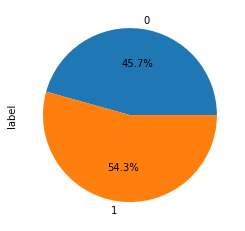

In [138]:
count_lable.plot.pie(autopct="%.1f%%")

C:\Users\Rayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

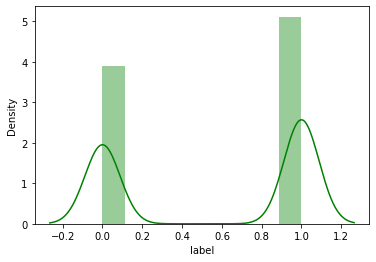

In [23]:
sns.distplot(df['label'],color='green')

C:\Users\Rayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

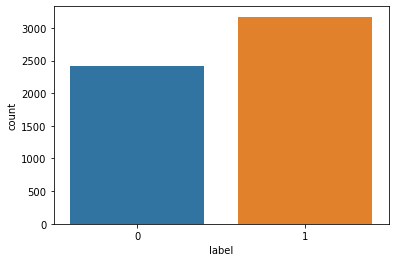

In [24]:
sns.countplot(df.label)

In [25]:
s=df.label.value_counts()

In [33]:
pd.pivot_table(df,index='label',values='label'.value_counts)

AttributeError: 'str' object has no attribute 'value_counts'